In [1]:
from __future__ import absolute_import, division, print_function # Python2 compatibility
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from The_Payne import utils
from The_Payne import training

from astropy.io import fits
import torch
from The_Payne import spectral_model
from The_Payne import fitting
import os
import scipy

In [2]:
wavelength = utils.load_wavelength_array(survey='galah')

In [3]:
fits = fits.open('/home/zhangxu/Payne_GALAH/4star.fits', ignore_missing_end=True)
data = fits[1].data
flux = data['flux']

In [4]:
data['gbs']

chararray(['Arcturus', 'betHyi', 'Sun', 'Procyon'], dtype='<U8')

In [5]:
synthetic_SunArc = np.load("GALAH_NordlanderSunArc_GUESSnorm.npz")
smod_norm_guess = synthetic_SunArc['smod_norm_guess']

In [6]:
interpolated_sun_spectra = np.array([scipy.interp(wavelength, synthetic_SunArc['wavelength'], smod_norm_guess[1])]).reshape(14304)
interpolated_arc_spectra = np.array([scipy.interp(wavelength, synthetic_SunArc['wavelength'], smod_norm_guess[0])]).reshape(14304)

(-0.02, 0.5)

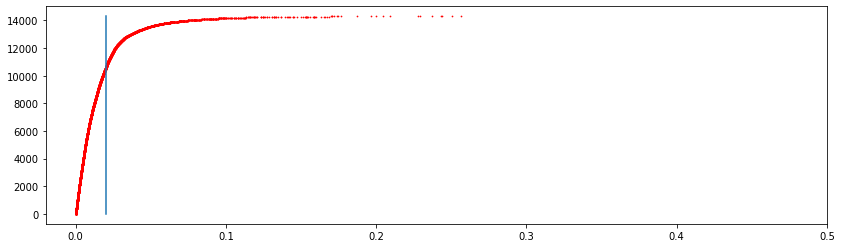

In [7]:
##Sun
plt.figure(figsize=(14, 4))
plt.scatter(np.sort(abs(flux[2,:]-interpolated_sun_spectra)),np.arange(1,(abs(flux[2,:]-interpolated_sun_spectra).shape[0])+1,1),s=0.5,c='r')
plt.plot([0.02,0.02],[0,abs(flux[0,:]-interpolated_sun_spectra).shape[0]])
plt.xlim(-.02,0.5)

(-0.02, 0.5)

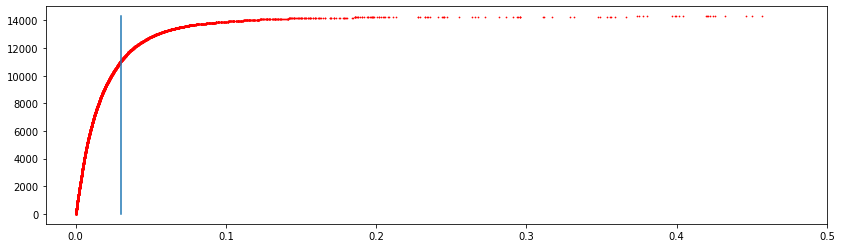

In [11]:
##Arc
plt.figure(figsize=(14, 4))
plt.scatter(np.sort(abs(flux[0,:]-interpolated_arc_spectra)),np.arange(1,(abs(flux[0,:]-interpolated_arc_spectra).shape[0])+1,1),s=0.5,c='r')
plt.plot([0.03,0.03],[0,abs(flux[1,:]-interpolated_arc_spectra).shape[0]])
plt.xlim(-.02,0.5)

In [12]:
# mask_in_sun = (np.array(np.where((abs(flux[0,:]-interpolated_sun_spectra)) > 0.02))).ravel()

In [13]:
norm_spec_from_payne = utils.renormalised_norm_spec_from_payne(wavelength, norm_spec=flux[2,:], norm_spec_from_payne=interpolated_sun_spectra)

AttributeError: module 'The_Payne.utils' has no attribute 'renormalised_norm_spec_from_payne'

In [14]:
mask_in_sun = abs(flux[2,:]-interpolated_sun_spectra) > 0.02

In [51]:
mask_in_arc = abs(flux[0,:]-interpolated_arc_spectra) > 0.03

In [ ]:
# mask_in_arc = (np.array(np.where((abs(flux[1,:]-interpolated_arc_spectra)) > 0.03))).ravel()

In [ ]:
# print(mask_in_sun.shape)
# print(mask_in_arc.shape)

In [ ]:
# allmask =np.unique(np.hstack((mask_in_sun,mask_in_arc)))

In [52]:
mask = mask_in_sun | mask_in_arc

In [15]:
mask =mask_in_sun

In [ ]:
mask_in_arc

In [13]:
mask

array([ True, False, False, ...,  True,  True, False])

In [16]:
np.savez('mask.npz',mask=mask) 

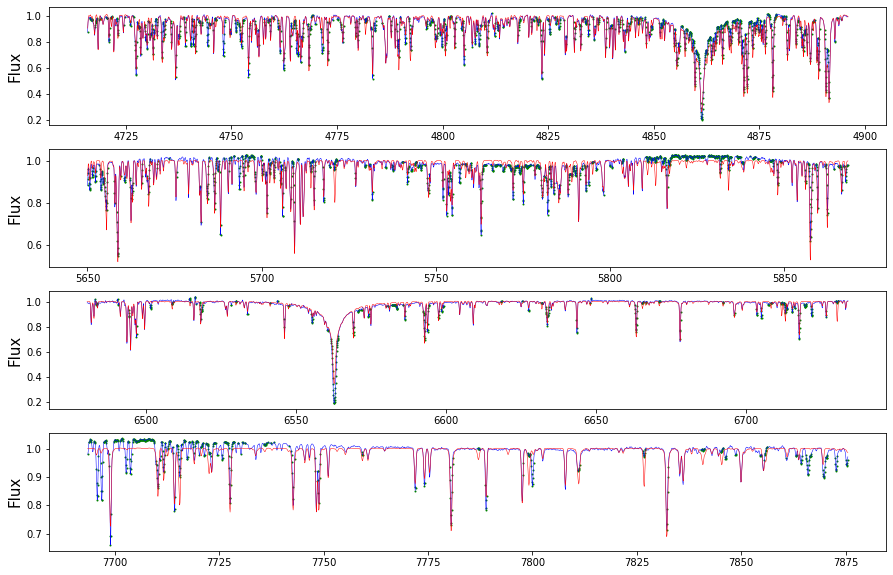

In [20]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
#    ax.plot(wavelength[ccd[it]], norm_spec_from_payne[ccd[it]], 'r', lw=0.5)           
    ax.plot(wavelength[ccd[it]], flux[2,:][ccd[it]], 'b', lw=0.5)                           #obs spectra
#    ax.plot(wavelength[ccd[it]], fitted_spectra[2][ccd[it]], 'g', lw=0.5)                  #Payne best fitted spectra
    ax.plot(wavelength[ccd[it]], interpolated_sun_spectra[ccd[it]], 'r', lw=0.5)            #synthetic spectra
    ax.scatter(wavelength[ccd[it]&mask], flux[2,:][ccd[it]&mask], s=1, c='g', marker='o')   #mask dots
    

#    ax.plot(wavelength[ccd[it]], flux[2,:][ccd[it]]-interpolated_sun_spectra[ccd[it]], 'g', lw=0.5)
#    ax.plot(wavelength[ccd[it]], flux[2,:][ccd[it]]-norm_spec_from_payne[ccd[it]], 'r', lw=0.5)
#    ax.scatter(wavelength[ccd[it]&mask], flux[2,:][ccd[it]&mask]-interpolated_sun_spectra[ccd[it]&mask], s=0.1, c='r', marker='o')


#    ax.legend(labels=['Observed Sun spec','Synthetic spec from Thomas'],loc='best')
    ax.set_ylabel('Flux',fontsize=15)
fig = plt.gcf()
fig.savefig('Sun_spectra.png', format='png')

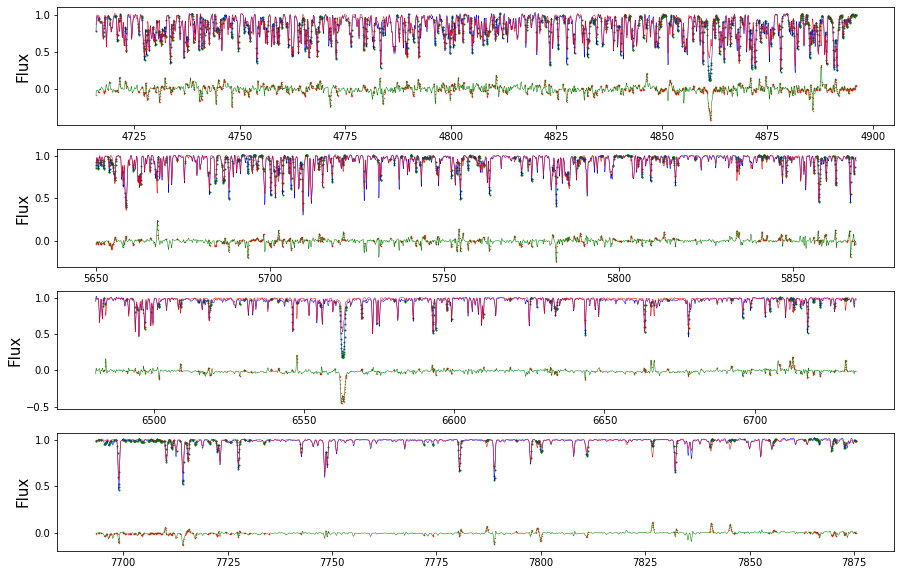

In [31]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
    
    ax.plot(wavelength[ccd[it]], flux[0,:][ccd[it]], 'b', lw=0.5)                          #obs spectra
#    ax.plot(wavelength[ccd[it]], fitted_spectra[0][ccd[it]], 'g', lw=0.5)                   #Payne best fitted spectra
    ax.plot(wavelength[ccd[it]], interpolated_arc_spectra[ccd[it]], 'r', lw=0.5)            #synthetic spectra
    ax.scatter(wavelength[ccd[it]&mask], flux[0,:][ccd[it]&mask], s=1, c='g', marker='o')   #mask dots

    ax.plot(wavelength[ccd[it]], flux[0,:][ccd[it]]-interpolated_arc_spectra[ccd[it]], 'g', lw=0.5)
    ax.scatter(wavelength[ccd[it]&mask], flux[0,:][ccd[it]&mask]-interpolated_arc_spectra[ccd[it]&mask], s=0.1, c='r', marker='o')

#    ax.legend(labels=['Obs Arc spec','best fit form Payne','synthetic from Thomas'],loc='best')
    ax.set_ylabel('Flux',fontsize=15)
fig = plt.gcf()

In [ ]:
# teff_grid = np.linspace(5500, 6000, 51)
# logg_grid = np.linspace(4.0, 5.0, 11)
# feh_grid = 0.0
# alpha_grid = 0.0
# abroad_grid = 6.51551

In [ ]:
# X,Y,Z,U,V = np.meshgrid(teff_grid, logg_grid,feh_grid, alpha_grid, abroad_grid)

In [ ]:
# teff = X.flatten().reshape(X.flatten().shape[0],1)
# logg = Y.flatten().reshape(Y.flatten().shape[0],1)
# feh = Z.flatten().reshape(Z.flatten().shape[0],1)
# alpha = U.flatten().reshape(U.flatten().shape[0],1)
# abroad = V.flatten().reshape(V.flatten().shape[0],1)

In [ ]:
# labels = np.concatenate((teff, logg, feh, alpha, abroad), axis=1)

In [ ]:
# norm_labels = (labels-full_x_min)/(full_x_max-full_x_min) - 0.5

In [ ]:
# def simple_fit_func(norm_labels):
#     norm_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = norm_labels, 
#             NN_coeffs = NN_coeffs)
#     return norm_spec

In [ ]:
# n=0
# norm_spec = []
# for each in norm_labels:
#     each_spec = simple_fit_func(each)
#     n+=1
#     print(n,each_spec)
#     norm_spec.append(each_spec)

In [ ]:
# from astropy.io import fits
# fits_4stars = fits.open('/home/zhangxu/Payne_GALAH/4star.fits', ignore_missing_end=True)
# data_4star = fits_4stars[1].data

# sun_flux = data_4star['flux'][2]

In [ ]:
# kai_s = []
# for i in range(len(norm_spec)):
#     kai = scipy.stats.chisquare(f_obs = norm_spec[i], f_exp=sun_flux)
#     kai = np.array(kai[0])
#     print(kai)
#     kai_s.append(kai)
    
# kai_s = np.array(kai_s)

In [ ]:
# fig = plt.figure(figsize=(8, 6))
# ax=fig.gca()
# cax=ax.scatter(labels[:,0], labels[:,1], c= (kai_s-kai_s.mean())/kai_s.std(), s=1, cmap='jet')
# cbar = fig.colorbar(cax)
# font = {'size'   : 16,}
# cbar.set_label('Kai_square',fontdict=font)

In [ ]:
# teff_grid = 5772
# logg_grid = 4.438
# feh_grid = np.linspace(-4.0, 4.0, 81)
# alpha_grid = np.linspace(-1.0, 1, 21)
# abroad_grid = 6.51551

In [ ]:
# X,Y,Z,U,V = np.meshgrid(teff_grid, logg_grid,feh_grid, alpha_grid, abroad_grid)

In [ ]:
# teff = X.flatten().reshape(X.flatten().shape[0],1)
# logg = Y.flatten().reshape(Y.flatten().shape[0],1)
# feh = Z.flatten().reshape(Z.flatten().shape[0],1)
# alpha = U.flatten().reshape(U.flatten().shape[0],1)
# abroad = V.flatten().reshape(V.flatten().shape[0],1)

In [ ]:
# labels = np.concatenate((teff, logg, feh, alpha, abroad), axis=1)

In [ ]:
# norm_labels = (labels-full_x_min)/(full_x_max-full_x_min) - 0.5

In [ ]:
# def simple_fit_func(norm_labels):
#     norm_spec = spectral_model.get_spectrum_from_neural_net(scaled_labels = norm_labels, 
#             NN_coeffs = NN_coeffs)
#     return norm_spec

In [ ]:
# n=0
# norm_spec = []
# for each in norm_labels:
#     each_spec = simple_fit_func(each)
#     n+=1
#     print(n,each_spec)
#     norm_spec.append(each_spec)

In [ ]:
# kai_s = []
# for i in range(len(norm_spec)):
#     kai = scipy.stats.chisquare(f_obs = norm_spec[i], f_exp=sun_flux)
#     kai = np.array(kai[0])
#     kai_s.append(kai)
    
# kai_s = np.array(kai_s)

In [ ]:
# fig = plt.figure(figsize=(8, 6))
# ax=fig.gca()
# cax=ax.scatter(labels[:,2], labels[:,3], c=(kai_s-kai_s.min())/(kai_s.max()-kai_s.min()), s=1, cmap='jet')
# cbar = fig.colorbar(cax)
# font = {'size'   : 16,}
# cbar.set_label('Kai_square',fontdict=font)